In [1]:

import pandas as pd

In [2]:
df = pd.read_csv("D:\Github_slash_mark_project\slash_mark_project\major-project\model-2\data\spotify_millsongdata.csv")

In [3]:

df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
3,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
4,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."


In [4]:
df.tail(5)

,artist,song,link,text
57644,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57645,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57646,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57647,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57648,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [5]:

df.shape

(57649, 4)

In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df =df.sample(15000).drop('link', axis=1).reset_index(drop=True)

In [8]:

df['text'][0]

"George, George, George of the jungle  \r\nStrong as he can be  \r\nAhhh  \r\nWatch out for that tree  \r\n  \r\nGeorge, George, George of the jungle  \r\nLives a life that's free  \r\nAhhh  \r\nWatch out for that tree  \r\n  \r\nWhen he gets in scrapes  \r\nWhen he makes his escapes  \r\nWith the help of his friend  \r\nAn ape named Ape  \r\n  \r\nThen away he'll schlep  \r\nOn his elephant Shep  \r\nWhile Fella and Ursula  \r\nStay in step with  \r\n  \r\nGeorge, George, George of the jungle  \r\nFriend to you and me  \r\nAhhh  \r\nWatch out for that tree  \r\nWatch out for that (Ahhh) (Oooh) tree  \r\nGeorge, George, George of the Jungle  \r\nFriend to you and me\r\n\r\n"

In [9]:

df.shape

(15000, 3)

# Text cleaning 


In [10]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [11]:
df['text'][0]

"george, george, george of the jungle  \r strong as he can be  \r ahhh  \r watch out for that tree  \r   \r george, george, george of the jungle  \r lives a life that's free  \r ahhh  \r watch out for that tree  \r   \r when he gets in scrapes  \r when he makes his escapes  \r with the help of his friend  \r an ape named ape  \r   \r then away he'll schlep  \r on his elephant shep  \r while fella and ursula  \r stay in step with  \r   \r george, george, george of the jungle  \r friend to you and me  \r ahhh  \r watch out for that tree  \r watch out for that (ahhh) (oooh) tree  \r george, george, george of the jungle  \r friend to you and me\r \r "

# tokenization 

    - tf-idf
    - bag of word


In [ ]:
# # Assuming the DataFrame `df` already contains the necessary columns: 'song', 'text', 'artist'
# # Adding placeholder columns for 'id', 'link', and 'photo' for deployment purposes
# df['id'] = range(1, len(df) + 1)  # Assigning unique IDs
# df['link'] = 'https://example.com/song/' + df['id'].astype(str)  # Placeholder links
# df['photo'] = 'https://example.com/photo/' + df['id'].astype(str)  # Placeholder photo URLs

# # Saving the updated DataFrame as a pickle file for deployment
# pickle.dump(df, open('df_with_links.pkl', 'wb'))

In [12]:

import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)
    

In [13]:
tokenization('i am a student of computer engineering and i am learning data science and machine learning')


'i am a student of comput engin and i am learn data scienc and machin learn'

In [14]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [15]:
df['text'][0]

"georg , georg , georg of the jungl strong as he can be ahhh watch out for that tree georg , georg , georg of the jungl live a life that 's free ahhh watch out for that tree when he get in scrape when he make hi escap with the help of hi friend an ape name ape then away he 'll schlep on hi eleph shep while fella and ursula stay in step with georg , georg , georg of the jungl friend to you and me ahhh watch out for that tree watch out for that ( ahhh ) ( oooh ) tree georg , georg , georg of the jungl friend to you and me"

In [16]:
print(df['text'][0])

georg , georg , georg of the jungl strong as he can be ahhh watch out for that tree georg , georg , georg of the jungl live a life that 's free ahhh watch out for that tree when he get in scrape when he make hi escap with the help of hi friend an ape name ape then away he 'll schlep on hi eleph shep while fella and ursula stay in step with georg , georg , georg of the jungl friend to you and me ahhh watch out for that tree watch out for that ( ahhh ) ( oooh ) tree georg , georg , georg of the jungl friend to you and me


In [17]:
# CONTENT BASED FILTERING
# COLABRATIVE FILTERING
# HYBRID FILTERING

In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [20]:
similarity

array([[1.        , 0.00172825, 0.        , ..., 0.0528429 , 0.00222468,
        0.00600476],
       [0.00172825, 1.        , 0.07062088, ..., 0.04269731, 0.03399991,
        0.01919016],
       [0.        , 0.07062088, 1.        , ..., 0.02645514, 0.01622219,
        0.04122778],
       ...,
       [0.0528429 , 0.04269731, 0.02645514, ..., 1.        , 0.06451711,
        0.1070866 ],
       [0.00222468, 0.03399991, 0.01622219, ..., 0.06451711, 1.        ,
        0.00778513],
       [0.00600476, 0.01919016, 0.04122778, ..., 0.1070866 , 0.00778513,
        1.        ]])

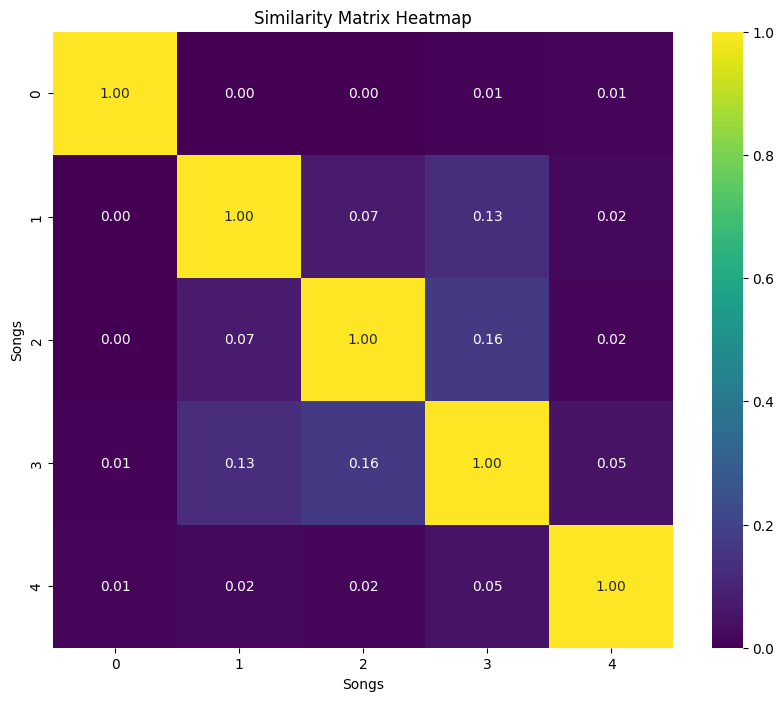

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarity[:5, :5], cmap='viridis', annot=True, fmt=".2f")  
plt.title("Similarity Matrix Heatmap")
plt.xlabel("Songs")
plt.ylabel("Songs")
plt.show()


In [22]:
df[df['song'] == 'Crying Over You']

,artist,song,text
13548,UB40,Crying Over You,cri over you in the morn cri over you in the e...


In [23]:
# Recomandation function

In [24]:

def recommendation(song_df):
    idx = df[df['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
    songs = []
    for m_id in distances[1:21]:
        songs.append(df.iloc[m_id[0]].song)
        
    return songs

In [25]:
recommendation('Crying Over You')

['Cry, Cry, Cry',
 'Cry Cry Darling',
 "Don't Cry",
 "Don't Cry Now",
 'Cry Over Me',
 'Cry Me A River',
 "It's The Falling In Love",
 'I Cry',
 'Cry Me A River',
 'Everyday I Have To Cry',
 'Cry Baby',
 "Isn't Life Strange",
 'Cry, Cry, Cry',
 "Don't Say Goodbye Again",
 'No Woman',
 'The Same Love That Made Me Laugh',
 'Cry A While',
 "You Won't See Me Cry",
 'Cry Me A River',
 'One Last Cry']

In [26]:
import pickle

In [27]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [28]:
pickle.dump(df,open('df.pkl','wb'))